Example 2 - Effect of varying slenderness ratio
=========
In this example, we use the rotor seen in Example 5.8.2 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ross as rs

In [2]:
steel = rs.materials.steel

In [3]:
number_of_elements = [2, 3, 4, 5, 6, 7, 8]

In [4]:
def create_rotor(n_el, R, shear_effects=False, rotary_inertia=False):
    """Create example rotor with given number of elements and R ration."""
    L_total = 1
    D = R * L_total
    
    shaft = [
        rs.ShaftElement(1./(n_el), idl=0, odl=D, material=steel,
                        shear_effects=shear_effects,
                        rotary_inertia=rotary_inertia)
        for i in range(n_el)
    ]

    bearings = [
        rs.BearingElement(0, kxx=1e15, cxx=0),
        rs.BearingElement(n_el, kxx=1e15, cxx=0)
    ]
    
    return rs.Rotor(shaft_elements=shaft, bearing_elements=bearings, sparse=False)

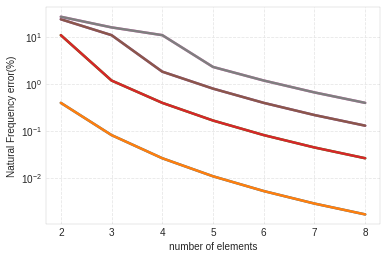

In [5]:
# create reference rotor with 80 elements
R = 0.04
rotor_80 = create_rotor(80, R)
modal_80 = rotor_80.run_modal(speed=0)

n_eigen = 8 
errors = np.zeros([len(number_of_elements), n_eigen])

for i, n_el in enumerate(number_of_elements):
    rotor = create_rotor(n_el, R)
    modal = rotor.run_modal(speed=0)
    errors[i, :] = abs(
        100 * (modal.wn[:n_eigen] - modal_80.wn[:n_eigen]) 
        / modal_80.wn[:n_eigen])

fig, ax = plt.subplots()
ax.set_xlabel('number of elements')
ax.set_ylabel('Natural Frequency error(%)')
for i in range(8):
    ax.semilogy(number_of_elements, errors[:, i])

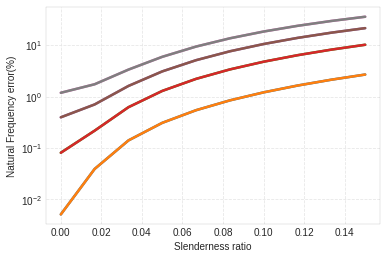

In [6]:
# create reference rotor with 80 elements
n_el = 6 
R_list = np.linspace(1e-4, 0.15, 10)

n_eigen = 8 
errors = np.zeros([len(R_list), n_eigen])

for i, R in enumerate(R_list):
    rotor_ref = create_rotor(100, R, 
                             shear_effects=True, rotary_inertia=True)
    modal_ref = rotor_ref.run_modal(speed=0)

    rotor = create_rotor(n_el, R)
    modal = rotor.run_modal(speed=0)
    errors[i, :] = abs(
        100 * (modal.wn[:n_eigen] - modal_ref.wn[:n_eigen]) 
        / modal_ref.wn[:n_eigen])

fig, ax = plt.subplots()
ax.set_xlabel('Slenderness ratio')
ax.set_ylabel('Natural Frequency error(%)')
for i in range(8):
    ax.semilogy(R_list, errors[:, i])